In [3]:
import seaborn as sns  
import matplotlib.pyplot as plt  
import pandas as pd 
from tqdm import tqdm  
import os 
import statsmodels.api as sm  
import numpy as np
from tqdm import tqdm

In [4]:
path='/home2/zhenglijing/work/bigwig/dfSFARInew.csv'
dfSFARI=pd.read_csv(path)

In [5]:
dfSFARI

,Unnamed: 0,index,Chr,Start,End,Ref,Alt,Func.refGene,Gene.refGene,GeneDetail.refGene,...,AMR.sites.2015_08,SAS.sites.2015_08,EUR.sites.2015_08,EAS.sites.2015_08,p_value,vaf,number,type,combine,depth
0,0,52,chr1,8390926,8390926,C,T,exonic,SLC45A1,.,...,.,.,.,.,0.000855,0.136364,SRR8697686,ASD,chr1-8390926-8390926-C-T-SLC45A1,22.0
1,1,53,chr1,8412935,8412935,C,T,UTR3,RERE,NM_001042682:c.*2212G>A;NM_012102:c.*2212G>A;N...,...,0.5634,0.4059,0.4712,0.8413,0.070756,0.322581,SRR8697686,ASD,chr1-8412935-8412935-C-T-RERE,31.0
2,2,56,chr1,9009214,9009214,C,T,intronic,CA6,.,...,0.3804,0.3282,0.4155,0.2341,0.343750,0.300000,SRR8697686,ASD,chr1-9009214-9009214-C-T-CA6,10.0
3,3,57,chr1,9011537,9011537,G,A,intronic,CA6,.,...,0.3545,0.2301,0.3917,0.13,0.072177,0.377049,SRR8697686,ASD,chr1-9011537-9011537-G-A-CA6,61.0
4,4,58,chr1,9011586,9011586,T,G,intronic,CA6,.,...,0.5533,0.5971,0.6352,0.7014,0.015432,0.347826,SRR8697686,ASD,chr1-9011586-9011586-T-G-CA6,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117040,187449,2596783,chr20,47256335,47256335,G,A,exonic,PREX1,.,...,0.0072,0.0286,.,0.0744,0.024120,0.275862,CM202304160115,ASD,chr20-47256335-47256335-G-A-PREX1,30.0
117041,187450,2596784,chr20,47261017,47261017,T,C,exonic,PREX1,.,...,0.3559,0.4519,0.2624,0.369,0.078354,0.285714,CM202304160115,ASD,chr20-47261017-47261017-T-C-PREX1,21.0
117042,187451,2596785,chr20,47262549,47262549,C,T,exonic,PREX1,.,...,0.0893,0.1411,0.0805,0.0873,0.070756,0.322581,CM202304160115,ASD,chr20-47262549-47262549-C-T-PREX1,30.0
117043,187452,2596794,chr20,52561702,52561702,C,T,intronic,BCAS1,.,...,0.1383,0.3415,0.1938,0.3829,0.344928,0.392857,CM202304160115,ASD,chr20-52561702-52561702-C-T-BCAS1,29.0


## vaf>0.1

In [6]:
dfSFARIf=dfSFARI[dfSFARI['vaf']>0.1]

In [7]:
dfSFARIf

,Unnamed: 0,index,Chr,Start,End,Ref,Alt,Func.refGene,Gene.refGene,GeneDetail.refGene,...,AMR.sites.2015_08,SAS.sites.2015_08,EUR.sites.2015_08,EAS.sites.2015_08,p_value,vaf,number,type,combine,depth
0,0,52,chr1,8390926,8390926,C,T,exonic,SLC45A1,.,...,.,.,.,.,0.000855,0.136364,SRR8697686,ASD,chr1-8390926-8390926-C-T-SLC45A1,22.0
1,1,53,chr1,8412935,8412935,C,T,UTR3,RERE,NM_001042682:c.*2212G>A;NM_012102:c.*2212G>A;N...,...,0.5634,0.4059,0.4712,0.8413,0.070756,0.322581,SRR8697686,ASD,chr1-8412935-8412935-C-T-RERE,31.0
2,2,56,chr1,9009214,9009214,C,T,intronic,CA6,.,...,0.3804,0.3282,0.4155,0.2341,0.343750,0.300000,SRR8697686,ASD,chr1-9009214-9009214-C-T-CA6,10.0
3,3,57,chr1,9011537,9011537,G,A,intronic,CA6,.,...,0.3545,0.2301,0.3917,0.13,0.072177,0.377049,SRR8697686,ASD,chr1-9011537-9011537-G-A-CA6,61.0
4,4,58,chr1,9011586,9011586,T,G,intronic,CA6,.,...,0.5533,0.5971,0.6352,0.7014,0.015432,0.347826,SRR8697686,ASD,chr1-9011586-9011586-T-G-CA6,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117040,187449,2596783,chr20,47256335,47256335,G,A,exonic,PREX1,.,...,0.0072,0.0286,.,0.0744,0.024120,0.275862,CM202304160115,ASD,chr20-47256335-47256335-G-A-PREX1,30.0
117041,187450,2596784,chr20,47261017,47261017,T,C,exonic,PREX1,.,...,0.3559,0.4519,0.2624,0.369,0.078354,0.285714,CM202304160115,ASD,chr20-47261017-47261017-T-C-PREX1,21.0
117042,187451,2596785,chr20,47262549,47262549,C,T,exonic,PREX1,.,...,0.0893,0.1411,0.0805,0.0873,0.070756,0.322581,CM202304160115,ASD,chr20-47262549-47262549-C-T-PREX1,30.0
117043,187452,2596794,chr20,52561702,52561702,C,T,intronic,BCAS1,.,...,0.1383,0.3415,0.1938,0.3829,0.344928,0.392857,CM202304160115,ASD,chr20-52561702-52561702-C-T-BCAS1,29.0


In [8]:
listcombine=dfSFARIf['combine'].unique().tolist()

In [9]:
dfall=dfSFARIf[dfSFARIf['depth']>=10]

In [10]:
csv_file_path = '/home2/zhenglijing/work/bigwig/allcountsfari2.csv'
dfcount=pd.read_csv(csv_file_path,index_col=0)
dfcount=dfcount.set_index('geneloci')
dfcount

,ASDcount,TDcount
geneloci,,
chr1-10697704-10697704-G-T-CASZ1,31,0
chr1-10698968-10698968---GGCCGC-CASZ1,25,0
chr1-10698968-10698968-A-C-CASZ1,25,0
chr1-10699066-10699066-G-C-CASZ1,58,6
chr1-10699141-10699146-TCGTCG---CASZ1,89,15
...,...,...
chrY-16941458-16941458-G-T-NLGN4Y,24,28
chrY-16952335-16952335-T-C-NLGN4Y,169,38
chrY-16952347-16952347-T-C-NLGN4Y,170,38


In [11]:
gene_counts_dict={}
for gene in tqdm(listcombine):
    ASDcount=dfcount.loc[gene,'ASDcount']
    TDcount=dfcount.loc[gene,'TDcount']    
    dftest=dfall[dfall['combine']==gene]
    TDmut=len(dftest[dftest['type']=="TD"])
    ASDmut=len(dftest[dftest['type']=="ASD"])
    df4= pd.DataFrame([[TDcount-TDmut,ASDcount-ASDmut],
                     [TDmut,ASDmut]
                     ],columns=['TD','ASD'],index=['non','mut'])
    gene_counts_dict[gene]=df4

  3%|▎         | 1009/36300 [00:08<04:57, 118.54it/s]


KeyboardInterrupt: 

In [219]:
df_dict={}
for gene_name, table in tqdm(list(gene_counts_dict.items())):
    dfls=[]
    nonTD=table.loc['non','TD']
    for i in  range(nonTD):
        dfls.append([0,0])
    nonASD=table.loc['non','ASD']
    for i in  range(nonASD):
        dfls.append([0,1])
    mutTD=table.loc['mut','TD']    
    for i in  range(mutTD):
        dfls.append([1,0])
    mutASD=table.loc['mut','ASD']
    for i in  range(mutASD):
        dfls.append([1,1])
    dfsub=pd.DataFrame(dfls,columns=['X','y'])
    df_dict[gene_name]=dfsub

100%|██████████| 36300/36300 [00:20<00:00, 1795.16it/s]


In [ ]:
import numpy as np  
import pandas as pd  
import statsmodels.api as sm  
from tqdm import tqdm  
from sklearn.preprocessing import StandardScaler

listresult = []  
faills=[]
for key,value in tqdm(list(df_dict.items())):  
    try:  
        X = np.array(value['X']).reshape(-1, 1)
        scaler = StandardScaler()  
        features = X
        features_scaled = scaler.fit_transform(X)  
        model = sm.Logit(value['y'], X).fit(maxiter=10000)  

        coef = model.params.iloc[0] 
        OR_values = np.exp(coef) 
        pvalues = model.pvalues  .iloc[0]
        conf_int = model.conf_int(alpha=0.05)
        conf_int_lower = np.exp(conf_int.iloc[0,0])#.iloc)  
        conf_int_upper = np.exp(conf_int.iloc[0,1])#.iloc)  

        listresult.append([key, OR_values, pvalues, conf_int_lower, conf_int_upper])  
    except Exception as e:  
        print(f"{gene} failed with error: {e}")  
        faills.append([key,value])



In [45]:
dfsfaribefore=pd.read_csv('SFARIvaf>0.1.csv')

In [46]:
dfsfaribefore

,Unnamed: 0,0,1,2,3,4
0,0,chr1-9009214-9009214-C-T-CA6,1.000000e+01,0.028133,1.280125,78.117387
1,1,chr1-9011586-9011586-T-G-CA6,5.000000e+00,0.010936,1.447514,17.270986
2,2,chr1-9017204-9017204-A-G-CA6,1.666667e+00,0.322561,0.605745,4.585718
3,3,chr1-11292666-11292666-T-A-MTOR,3.333333e+00,0.067405,0.917380,12.111786
4,4,chr1-27876482-27876482-C-A-AHDC1,3.000000e+00,0.341388,0.312060,28.840590
...,...,...,...,...,...,...
20558,20558,chr16-29999321-29999321-C-T-TAOK2,1.679258e+12,0.999983,0.000000,inf
20559,20559,chr17-2298558-2298558-G-A-MNT,7.724991e+13,0.999997,0.000000,inf
20560,20560,chr17-34943346-34943346-G-C-GGNBP2,8.371840e+15,1.000000,0.000000,inf
20561,20561,chr20-30734803-30734803-G-T-TM9SF4,5.394040e+11,0.999971,0.000000,inf


In [47]:
dfsfaribefore = dfsfaribefore[(dfsfaribefore['1'] > 1) & (dfsfaribefore['2'] < 0.05)]

In [55]:
dfsfaribefore

,geneloci,OR,p_value,LCI,HCI
0,chr1-9009214-9009214-C-T-CA6,10.000000,0.028133,1.280125,78.117387
1,chr1-9011586-9011586-T-G-CA6,5.000000,0.010936,1.447514,17.270986
6,chr1-53972205-53972205-T-C-GLIS1,8.000000,0.049935,1.000586,63.962519
8,chr1-107946262-107946262-G-A-NTNG1,4.333333,0.022061,1.234857,15.206435
19,chr1-182854017-182854017-G-A-DHX9,9.000000,0.037117,1.140243,71.037508
...,...,...,...,...,...
12484,chr2-233612557-233612557-C-T-GIGYF2,5.500000,0.026576,1.219099,24.813414
12510,chr3-4856234-4856234-G-A-ITPR1,9.000000,0.037117,1.140243,71.037508
12722,chr3-174777244-174777244-C-G-NAALADL2,3.750000,0.018833,1.244610,11.298717
15535,chr2-210651068-210651068-G-A-UNC80,8.000000,0.049935,1.000586,63.962519


In [57]:
gene_list = dfsfaribefore["geneloci"].str.split("-").str[-1].tolist()

In [58]:
gene_list

['CA6',
 'CA6',
 'GLIS1',
 'NTNG1',
 'DHX9',
 'KDM5B',
 'TFB2M',
 'TPO',
 'NRXN1',
 'RAB11FIP5',
 'MAP4K4',
 'NCKAP5',
 'NR4A2',
 'BAZ2B',
 'BAZ2B',
 'SCN1A',
 'SCN1A',
 'SCN9A',
 'LRP2',
 'SF3B1',
 'HDAC4',
 'HDAC4',
 'CNTN4',
 'ITPR1',
 'ITPR1',
 'CACNA1D',
 'CACNA2D3',
 'EPHB1',
 'STAG1',
 'PIK3CA',
 'YEATS2',
 'HTR3C',
 'MUC4',
 'GRK4',
 'CPZ',
 'CPZ',
 'FRYL',
 'FRYL',
 'G3BP2',
 'SPARCL1',
 'CCSER1',
 'ANK2',
 'ZNF827',
 'CDH9',
 'PCDHA4',
 'PCDHA7',
 'GRIA1',
 'JARID2',
 'PPP2R5D',
 'DST',
 'HACE1',
 'MED23',
 'PEX7',
 'SYNE1',
 'SYNE1',
 'CARD11',
 'CARD11',
 'RAC1',
 'ABCA13',
 'DDC',
 'GTF2I',
 'AZGP1',
 'MUC12',
 'MUC12',
 'LAMB1',
 'CADPS2',
 'CEP41',
 'DPP6',
 'GRIP1',
 'PRKD1',
 'MDGA2',
 'CCDC88C',
 'HERC2',
 'HERC2',
 'TRPM1',
 'MYO5A',
 'MYO1E',
 'CHD9',
 'HYDIN',
 'CMIP',
 'CDH13',
 'MYH10',
 'MYH10',
 'TSPOAP1',
 'ELP2',
 'TCF4',
 'CASZ1',
 'MTHFR',
 'SPEN',
 'EPHB2',
 'MACF1',
 'MACF1',
 'MACF1',
 'NASP',
 'NASP',
 'AGBL4',
 'SCP2',
 'SCP2',
 'SCP2',
 'ALG6',
 'DPYD

In [59]:
unique_list = list(set(gene_list))

In [60]:
len(unique_list)

432

In [61]:
unique_list

['ABCA10',
 'GRM7',
 'PLCB1',
 'PRKD1',
 'KIF5C',
 'ABCE1',
 'EIF4G1',
 'STX1A',
 'KDM3B',
 'YEATS2',
 'UIMC1',
 'CLIP2',
 'ZWILCH',
 'BRAF',
 'NRP2',
 'PTK7',
 'MED12L',
 'BCAS1',
 'DLG1',
 'HERC2',
 'BIRC6',
 'FGF14',
 'TFB2M',
 'CPZ',
 'RERE',
 'CNTN3',
 'TAF1C',
 'MET',
 'KAT2B',
 'IQGAP3',
 'SLC6A3',
 'PCDHA5',
 'PCDHA3',
 'RPS6KA2',
 'NUP155',
 'PHLPP1',
 'CAMTA2',
 'SYNE1',
 'CDH13',
 'OXTR',
 'RBBP5',
 'GRIA1',
 'MYLK',
 'PCDHA7',
 'LAMA1',
 'HTR1B',
 'TBR1',
 'SATB2',
 'SETD2',
 'AZGP1',
 'CCT4',
 'GRK4',
 'MTHFR',
 'ILF2',
 'FRK',
 'ACE',
 'ZNF292',
 'TOP2B',
 'CMIP',
 'PCDHA11',
 'CBX1',
 'ACTB',
 'KIZ',
 'XPC',
 'NEO1',
 'NEGR1',
 'PPP3CA',
 'SASH1',
 'NR4A2',
 'ALDH5A1',
 'VIL1',
 'PDCD1',
 'SMAD4',
 'CACNA1G',
 'LRP2',
 'SETD5',
 'GIGYF1',
 'GRIP1',
 'DRD1',
 'NAALADL2',
 'NR3C2',
 'UBE3C',
 'RANBP17',
 'PER2',
 'GRID2IP',
 'SRGAP3',
 'CAMK4',
 'PHIP',
 'PIK3CA',
 'KRR1',
 'EN2',
 'NRXN1',
 'DAPP1',
 'NRCAM',
 'PHF14',
 'AMT',
 'GRID2',
 'PCDHAC1',
 'RIMS1',
 'FBN1',
 'GA

In [51]:
dfsfaribefore.drop('Unnamed: 0', axis=1, inplace=True)

/home2/zhenglijing/.local/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [54]:
dfsfaribefore.columns = ['geneloci', 'OR','p_value','LCI',"HCI"]

In [49]:
result_adjusted = {}
  
for i in listresult:  
    if (i[2] < 0.05)&(i[1] > 1): 
        result_adjusted[i[0]]=[i[1],i[3],i[4]]

NameError: name 'listresult' is not defined

In [224]:
result_adjusted

{'chr1-9009214-9009214-C-T-CA6': [9.999999999999993,
  1.2801247369345266,
  78.11738740356397],
 'chr1-9011586-9011586-T-G-CA6': [5.000000000000003,
  1.4475143554497327,
  17.27098588409695],
 'chr1-53972205-53972205-T-C-GLIS1': [7.999999999999998,
  1.0005859767726692,
  63.962519449281295],
 'chr1-107946262-107946262-G-A-NTNG1': [4.333333333333334,
  1.2348572931746524,
  15.206435497904888],
 'chr1-182854017-182854017-G-A-DHX9': [8.999999999999998,
  1.1402427020942119,
  71.03750793689133],
 'chr1-202715284-202715284-G-A-KDM5B': [6.500000000000008,
  1.4668286113559033,
  28.803637775339794],
 'chr1-246711789-246711789-T-A-TFB2M': [4.999999999999999,
  1.4475143554497316,
  17.270985884096945],
 'chr2-1418192-1418192-C-G-TPO': [15.999999999999963,
  2.1218833979917067,
  120.64753428124017],
 'chr2-50693505-50693506-AC---NRXN1': [11.000000000000002,
  1.420174364079866,
  85.2008056619133],
 'chr2-73316540-73316540-A-T-RAB11FIP5': [9.000000000000002,
  1.1402427020942125,
  71.03

In [23]:
dfsfaribefore

,Geneloci,OR,P,LCI,HCI
0,chr1-9009214-9009214-C-T-CA6,10.000000,0.028133,1.280125,78.117387
1,chr1-9011586-9011586-T-G-CA6,5.000000,0.010936,1.447514,17.270986
6,chr1-53972205-53972205-T-C-GLIS1,8.000000,0.049935,1.000586,63.962519
8,chr1-107946262-107946262-G-A-NTNG1,4.333333,0.022061,1.234857,15.206435
19,chr1-182854017-182854017-G-A-DHX9,9.000000,0.037117,1.140243,71.037508
...,...,...,...,...,...
12484,chr2-233612557-233612557-C-T-GIGYF2,5.500000,0.026576,1.219099,24.813414
12510,chr3-4856234-4856234-G-A-ITPR1,9.000000,0.037117,1.140243,71.037508
12722,chr3-174777244-174777244-C-G-NAALADL2,3.750000,0.018833,1.244610,11.298717
15535,chr2-210651068-210651068-G-A-UNC80,8.000000,0.049935,1.000586,63.962519


In [19]:
dfsfaribefore = dfsfaribefore.drop('Unnamed: 0', axis=1)

In [22]:
dfsfaribefore.columns = ['Geneloci','OR', 'P', 'LCI','HCI']

In [222]:
result_adjusted_df=pd.DataFrame(columns=['OR','LCI','HCI'])
for key in result_adjusted.keys():
    result_adjusted_df.loc[key]=result_adjusted[key]

In [228]:
result_adjusted_df.sort_values("OR",ascending=False)

,OR,LCI,HCI
chr2-179554305-179554305-C-T-TTN,29.000000,3.950435,212.887935
chr6-135639644-135639644-C-T-AHI1,25.000000,3.387516,184.500975
chr7-2957005-2957005-T-C-CARD11,22.000000,2.965450,163.212996
chr1-97839016-97839016-A-G-DPYD,22.000000,2.965450,163.212996
chr4-8608934-8608934-C-T-CPZ,21.000000,2.824794,156.117594
...,...,...,...
chr2-1520676-1520676-T-C-TPO,2.090909,1.019282,4.289198
chr16-64982472-64982476-AAGAG---CDH11,2.071429,1.094598,3.919992
chr15-28566444-28566444-C-T-HERC2,2.000000,1.076109,3.717094
chr3-195513779-195513779-C-T-MUC4,1.933333,1.036551,3.605976


In [34]:
dfchipbefore=pd.read_csv('beforefilterp+conut.csv')
dfchipbefore

,Unnamed: 0,geneloci,OR,p,LCI,HCI,TD_non,TD_mut,ASD_non,ASD_mut
0,0,chr1-664468-664468-G-T-LOC100133331,4.500000e+00,2.442487e-06,2.407454,8.411375,40.0,12.0,71.0,54.0
1,1,chr1-12940016-12940016-C-A-PRAMEF4,4.000000e+00,7.950952e-02,0.849427,18.836226,50.0,2.0,124.0,8.0
2,2,chr1-16908275-16908275-T-G-NBPF1,2.500000e+00,1.214264e-01,0.784084,7.971089,48.0,4.0,93.0,10.0
3,3,chr1-16918255-16918255-A-C-NBPF1,3.800000e+00,2.865394e-09,2.445964,5.903604,27.0,25.0,60.0,95.0
4,4,chr1-16969246-16969246-G-A-CROCCP2,3.156250e+00,1.461844e-08,2.120797,4.697250,20.0,32.0,76.0,101.0
...,...,...,...,...,...,...,...,...,...,...
1623,1623,chr12-64216816-64216816-A-C-RXYLT1-AS1,5.250000e+00,2.369065e-03,1.802149,15.294237,21.0,4.0,55.0,21.0
1624,1624,chr17-21905071-21905071-T-G-FLJ36000,1.000000e+00,1.000000e+00,0.062549,15.987508,20.0,1.0,79.0,1.0
1625,1625,chr1-243289588-243289588-T-C-CEP170,6.696973e+12,9.999909e-01,0.000000,inf,52.0,0.0,136.0,1.0
1626,1626,chr14-106066660-106066660-C-T-LOC105370697,6.119515e+11,9.999609e-01,0.000000,inf,29.0,0.0,94.0,2.0


In [35]:
for index, row in dfsfaribefore.iterrows():
    geneloci = row['0']
    if geneloci in gene_counts_dict.keys():
        counts = gene_counts_dict[geneloci]
        dfsfaribefore.at[index, 'TD_non'] = counts.loc['non']['TD']
        dfsfaribefore.at[index, 'TD_mut'] = counts.loc['mut']['TD']
        dfsfaribefore.at[index, 'ASD_non'] = counts.loc['non']['ASD']
        dfsfaribefore.at[index, 'ASD_mut'] = counts.loc['mut']['ASD']

KeyError: '0'

In [36]:
dfsfaribefore

,Geneloci,OR,P,LCI,HCI
0,chr1-9009214-9009214-C-T-CA6,10.000000,0.028133,1.280125,78.117387
1,chr1-9011586-9011586-T-G-CA6,5.000000,0.010936,1.447514,17.270986
6,chr1-53972205-53972205-T-C-GLIS1,8.000000,0.049935,1.000586,63.962519
8,chr1-107946262-107946262-G-A-NTNG1,4.333333,0.022061,1.234857,15.206435
19,chr1-182854017-182854017-G-A-DHX9,9.000000,0.037117,1.140243,71.037508
...,...,...,...,...,...
12484,chr2-233612557-233612557-C-T-GIGYF2,5.500000,0.026576,1.219099,24.813414
12510,chr3-4856234-4856234-G-A-ITPR1,9.000000,0.037117,1.140243,71.037508
12722,chr3-174777244-174777244-C-G-NAALADL2,3.750000,0.018833,1.244610,11.298717
15535,chr2-210651068-210651068-G-A-UNC80,8.000000,0.049935,1.000586,63.962519


In [37]:
import os, re
import random
import pyBigWig
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from tqdm import tqdm
from copy import copy, deepcopy
from scipy import stats
from scipy.ndimage import rotate  
from scipy.stats import kstest,linregress,zscore

import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pylab
from matplotlib import gridspec
from statannotations.Annotator import Annotator

In [28]:
def plot__p(x1,x2,height):
    plt.vlines(x1,height-height*0.01,height+height*0.00025,color='black', clip_on=False)
    plt.vlines(x2,height-height*0.01,height+height*0.00025,color='black', clip_on=False)
    plt.hlines(height,x1,x2         ,color='black', clip_on=False)

In [29]:
dfchipbefore[dfchipbefore['ASD_mut']>1]['OR']

0       4.500000e+00
1       4.000000e+00
2       2.500000e+00
3       3.800000e+00
4       3.156250e+00
            ...     
1621    2.000000e+00
1622    5.250000e+00
1623    5.250000e+00
1626    6.119515e+11
1627    6.119515e+11
Name: OR, Length: 1208, dtype: float64

In [30]:
dfchipbefore[(dfchipbefore['TD_mut']==0)]

,Unnamed: 0,geneloci,OR,p,LCI,HCI,TD_non,TD_mut,ASD_non,ASD_mut
93,93,chr17-20459625-20459630-TGGCTG---KRT16P3,3.151474e+15,1.000000,0.0,inf,33.0,0.0,93.0,1.0
94,94,chr17-20459625-20459630-TGGCTG---CDRT15L2,3.151474e+15,1.000000,0.0,inf,33.0,0.0,93.0,1.0
126,126,chr2-130987508-130987508-G-T-TUBA3E,2.355509e+15,0.999999,0.0,inf,52.0,0.0,167.0,4.0
127,127,chr2-130987508-130987508-G-T-CCDC115,2.355509e+15,0.999999,0.0,inf,52.0,0.0,167.0,4.0
128,128,chr3-22423335-22423335-C-T-ZNF385D-AS2,5.365282e+14,0.999997,0.0,inf,52.0,0.0,145.0,5.0
...,...,...,...,...,...,...,...,...,...,...
1613,1613,chr1-144828946-144828946-C-G-NBPF8,6.696973e+12,0.999991,0.0,inf,52.0,0.0,136.0,1.0
1614,1614,chr1-144828946-144828946-C-G-NBPF9,6.696973e+12,0.999991,0.0,inf,52.0,0.0,136.0,1.0
1625,1625,chr1-243289588-243289588-T-C-CEP170,6.696973e+12,0.999991,0.0,inf,52.0,0.0,136.0,1.0
1626,1626,chr14-106066660-106066660-C-T-LOC105370697,6.119515e+11,0.999961,0.0,inf,29.0,0.0,94.0,2.0


In [31]:
dfchipbefore[(dfchipbefore['OR']>100000000000)&(dfchipbefore['ASD_mut']>1)]

,Unnamed: 0,geneloci,OR,p,LCI,HCI,TD_non,TD_mut,ASD_non,ASD_mut
126,126,chr2-130987508-130987508-G-T-TUBA3E,2.355509e+15,0.999999,0.0,inf,52.0,0.0,167.0,4.0
127,127,chr2-130987508-130987508-G-T-CCDC115,2.355509e+15,0.999999,0.0,inf,52.0,0.0,167.0,4.0
128,128,chr3-22423335-22423335-C-T-ZNF385D-AS2,5.365282e+14,0.999997,0.0,inf,52.0,0.0,145.0,5.0
129,129,chr3-22423335-22423335-C-T-UBE2E2-AS1,5.365282e+14,0.999997,0.0,inf,52.0,0.0,145.0,5.0
140,140,chr12-9707329-9707329-G-T-OVOS,8.016575e+14,0.999998,0.0,inf,21.0,0.0,39.0,6.0
...,...,...,...,...,...,...,...,...,...,...
1529,1529,chr4-4228424-4228425-TT-CC-OTOP1,8.149073e+12,0.999988,0.0,inf,9.0,0.0,96.0,2.0
1559,1559,chr15-30699904-30699904-G-A-GOLGA8R,1.546175e+13,0.999989,0.0,inf,18.0,0.0,58.0,3.0
1575,1575,chr1-47548189-47548189-A-G-CYP4Z1,2.551722e+12,0.999975,0.0,inf,52.0,0.0,159.0,3.0
1626,1626,chr14-106066660-106066660-C-T-LOC105370697,6.119515e+11,0.999961,0.0,inf,29.0,0.0,94.0,2.0


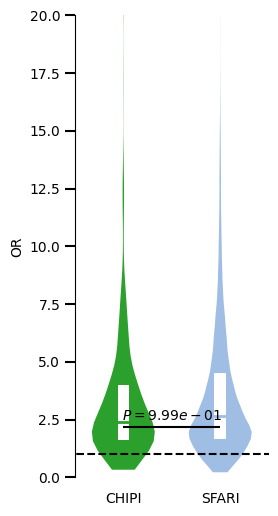

In [239]:
plt.figure(figsize=(2.5, 6))

typeplot=['CHIPI', 'SFARI'  ]
data=[
    dfchipbefore [ (dfchipbefore['ASD_mut']>1)& (dfchipbefore['TD_mut']>0)]['OR'],
    dfsfaribefore[(dfsfaribefore['ASD_mut']>1)&(dfsfaribefore['TD_mut']>0)]['1']
]

violins = plt.violinplot(data, showmeans=False, showmedians=False, showextrema=False,widths=0.65,
                        )

colors =["#2CA02C",'#a0bde4', "#784880",  '#CA4B32',"#5A9CCB",'#b3b3b3',]
for pc, color in zip(violins['bodies'], colors):
    pc.set_facecolor(color)
    pc.set_edgecolor('black')
    pc.set_alpha(1)

for i, d in enumerate(data):
    plt.boxplot(d, positions=[i + 1], widths=0.12, patch_artist=True,
                boxprops=dict(facecolor='white', color='black',linewidth=0),
                medianprops=dict(color=colors[i],linewidth=2),
                whiskerprops={'linestyle': 'none'},
                capprops={'linestyle': 'none'},
                flierprops=dict(marker='o', color='black', markersize=0))

for pc in violins['bodies']:
    pc.set_edgecolor('none')
plt.xticks([i+1 for i in range(len(typeplot))], typeplot)
plt.ylabel('OR')


u_statistic, p_value = stats.mannwhitneyu(data[0].dropna(),data[1].dropna(),alternative='greater')
plt.text(1.5, 2.5, f'$P = {p_value:.2e}$', ha='center')
plot__p(1,2,2.2)

plt.ylim(0,20)
plt.xlim(0.5,2.5)
'''y_locs = [0,4,8,12]
plt.yticks(y_locs,fontsize=14)'''
plt.tick_params(which='both', width=1.5, length=7, left=True, bottom=False)
plt.xlabel('')
plt.hlines(1,-1,4,color='black',ls='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.show()

In [104]:
dfchipbefore[(dfchipbefore['p']<0.05)&(dfchipbefore['OR']>1)]

,Unnamed: 0,geneloci,OR,p,LCI,HCI,TD_non,TD_mut,ASD_non,ASD_mut
0,0,chr1-13418-13418-G-A-DDX11L1,3.062500,1.014654e-04,1.741739,5.384795,38.0,16.0,164.0,49.0
1,1,chr1-13418-13418-G-A-LOC102725121,3.062500,1.014654e-04,1.741739,5.384795,38.0,16.0,164.0,49.0
2,2,chr1-1581713-1581713-A-G-CDK11B,2.285714,9.883930e-03,1.219740,4.283282,40.0,14.0,121.0,32.0
6,6,chr1-16918255-16918255-A-C-NBPF1,3.800000,2.865394e-09,2.445964,5.903604,29.0,25.0,60.0,95.0
7,7,chr1-16973606-16973606-G-T-MST1P2,2.553191,5.114344e-08,1.822269,3.577290,7.0,47.0,76.0,120.0
...,...,...,...,...,...,...,...,...,...,...
1138,1138,chr2-88019376-88019376-C-T-LOC730268,5.500000,2.657631e-02,1.219099,24.813414,52.0,2.0,146.0,11.0
1269,1269,chr2-107042610-107042610-G-T-RGPD3,9.000000,3.711741e-02,1.140243,71.037508,51.0,1.0,150.0,9.0
1278,1278,chrY-16952347-16952347-T-C-NLGN4Y,8.000000,4.993548e-02,1.000586,63.962519,38.0,1.0,162.0,8.0
1624,1624,chr12-64216816-64216816-A-C-MIR10527,5.250000,2.369065e-03,1.802149,15.294237,21.0,4.0,55.0,21.0


In [75]:
dfsfaribefore[(dfsfaribefore['2']<0.05)&(dfsfaribefore['1']>1)]

,Unnamed: 0,0,1,2,3,4
0,0,chr1-63825753-G-A-ALG6,5.0,0.037730,1.095550,22.819592
2,2,chr1-247938569-C-T-OR1C1,12.0,0.016967,1.560352,92.286867
12,12,chr1-111391579-A-G-KCNA3,8.0,0.049935,1.000586,63.962519
25,25,chr3-195461592-T-G-MUC4,13.5,0.000383,3.210328,56.769907
26,26,chr4-114309839-C-T-ANK2,7.5,0.007436,1.715142,32.796123
...,...,...,...,...,...,...
6988,6988,chr2-179633298-G-T-TTN,8.0,0.049935,1.000586,63.962519
7249,7249,chr7-7545691-G-C-COL28A1,8.0,0.049935,1.000586,63.962519
7260,7260,chr9-135786112-T-C-TSC1,9.0,0.037117,1.140243,71.037508
7500,7500,chr2-233711987-G-A-GIGYF2,8.0,0.049935,1.000586,63.962519


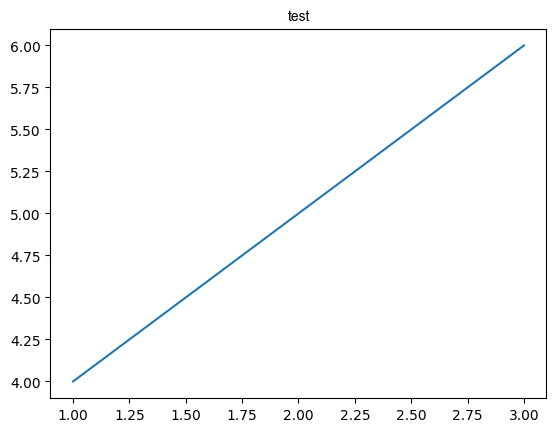

In [240]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

font_path = '/home2/zhenglijing/work/Arial.ttf'font = FontProperties(fname=font_path)

plt.plot([1, 2, 3], [4, 5, 6])
plt.title('test', fontproperties=font)
plt.show()

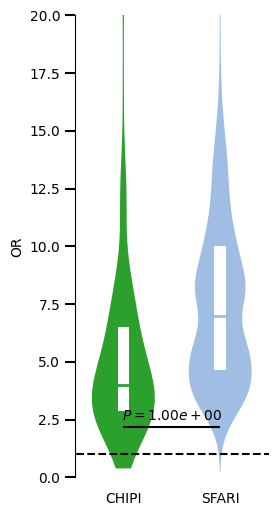

In [241]:
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(2.5, 6))

typeplot=['CHIPI', 'SFARI'  ]
data=[
    dfchipbefore [ (dfchipbefore['ASD_mut']>1)& (dfchipbefore['TD_mut']>0)& (dfchipbefore['p']<0.05)]['OR'],
    dfsfaribefore[(dfsfaribefore['ASD_mut']>1)&(dfsfaribefore['TD_mut']>0)&(dfsfaribefore['2']<0.05)]['1']
]

violins = plt.violinplot(data, showmeans=False, showmedians=False, showextrema=False,widths=0.65,
                        )

colors =["#2CA02C",'#a0bde4', "#784880",  '#CA4B32',"#5A9CCB",'#b3b3b3',]
for pc, color in zip(violins['bodies'], colors):
    pc.set_facecolor(color)
    pc.set_edgecolor('black')
    pc.set_alpha(1)

for i, d in enumerate(data):
    plt.boxplot(d, positions=[i + 1], widths=0.12, patch_artist=True,
                boxprops=dict(facecolor='white', color='black',linewidth=0),
                medianprops=dict(color=colors[i],linewidth=2),
                whiskerprops={'linestyle': 'none'},
                capprops={'linestyle': 'none'},
                flierprops=dict(marker='o', color='black', markersize=0))

for pc in violins['bodies']:
    pc.set_edgecolor('none')
plt.xticks([i+1 for i in range(len(typeplot))], typeplot)
plt.ylabel('OR')


u_statistic, p_value = stats.mannwhitneyu(data[0].dropna(),data[1].dropna(),alternative='greater')
plt.text(1.5, 2.5, f'$P = {p_value:.2e}$', ha='center')
plot__p(1,2,2.2)

plt.ylim(0,20)
plt.xlim(0.5,2.5)
'''y_locs = [0,4,8,12]
plt.yticks(y_locs,fontsize=14)'''
plt.tick_params(which='both', width=1.5, length=7, left=True, bottom=False)
plt.xlabel('')
plt.hlines(1,-1,4,color='black',ls='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.show()

In [38]:
dfchipbefore

,Unnamed: 0,geneloci,OR,p,LCI,HCI,TD_non,TD_mut,ASD_non,ASD_mut
0,0,chr1-664468-664468-G-T-LOC100133331,4.500000e+00,2.442487e-06,2.407454,8.411375,40.0,12.0,71.0,54.0
1,1,chr1-12940016-12940016-C-A-PRAMEF4,4.000000e+00,7.950952e-02,0.849427,18.836226,50.0,2.0,124.0,8.0
2,2,chr1-16908275-16908275-T-G-NBPF1,2.500000e+00,1.214264e-01,0.784084,7.971089,48.0,4.0,93.0,10.0
3,3,chr1-16918255-16918255-A-C-NBPF1,3.800000e+00,2.865394e-09,2.445964,5.903604,27.0,25.0,60.0,95.0
4,4,chr1-16969246-16969246-G-A-CROCCP2,3.156250e+00,1.461844e-08,2.120797,4.697250,20.0,32.0,76.0,101.0
...,...,...,...,...,...,...,...,...,...,...
1623,1623,chr12-64216816-64216816-A-C-RXYLT1-AS1,5.250000e+00,2.369065e-03,1.802149,15.294237,21.0,4.0,55.0,21.0
1624,1624,chr17-21905071-21905071-T-G-FLJ36000,1.000000e+00,1.000000e+00,0.062549,15.987508,20.0,1.0,79.0,1.0
1625,1625,chr1-243289588-243289588-T-C-CEP170,6.696973e+12,9.999909e-01,0.000000,inf,52.0,0.0,136.0,1.0
1626,1626,chr14-106066660-106066660-C-T-LOC105370697,6.119515e+11,9.999609e-01,0.000000,inf,29.0,0.0,94.0,2.0


In [33]:
dfsfaribefore

,Geneloci,OR,P,LCI,HCI
0,chr1-9009214-9009214-C-T-CA6,10.000000,0.028133,1.280125,78.117387
1,chr1-9011586-9011586-T-G-CA6,5.000000,0.010936,1.447514,17.270986
6,chr1-53972205-53972205-T-C-GLIS1,8.000000,0.049935,1.000586,63.962519
8,chr1-107946262-107946262-G-A-NTNG1,4.333333,0.022061,1.234857,15.206435
19,chr1-182854017-182854017-G-A-DHX9,9.000000,0.037117,1.140243,71.037508
...,...,...,...,...,...
12484,chr2-233612557-233612557-C-T-GIGYF2,5.500000,0.026576,1.219099,24.813414
12510,chr3-4856234-4856234-G-A-ITPR1,9.000000,0.037117,1.140243,71.037508
12722,chr3-174777244-174777244-C-G-NAALADL2,3.750000,0.018833,1.244610,11.298717
15535,chr2-210651068-210651068-G-A-UNC80,8.000000,0.049935,1.000586,63.962519


In [41]:
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = "Arial"
plt.rcParams["pdf.fonttype"] = 42

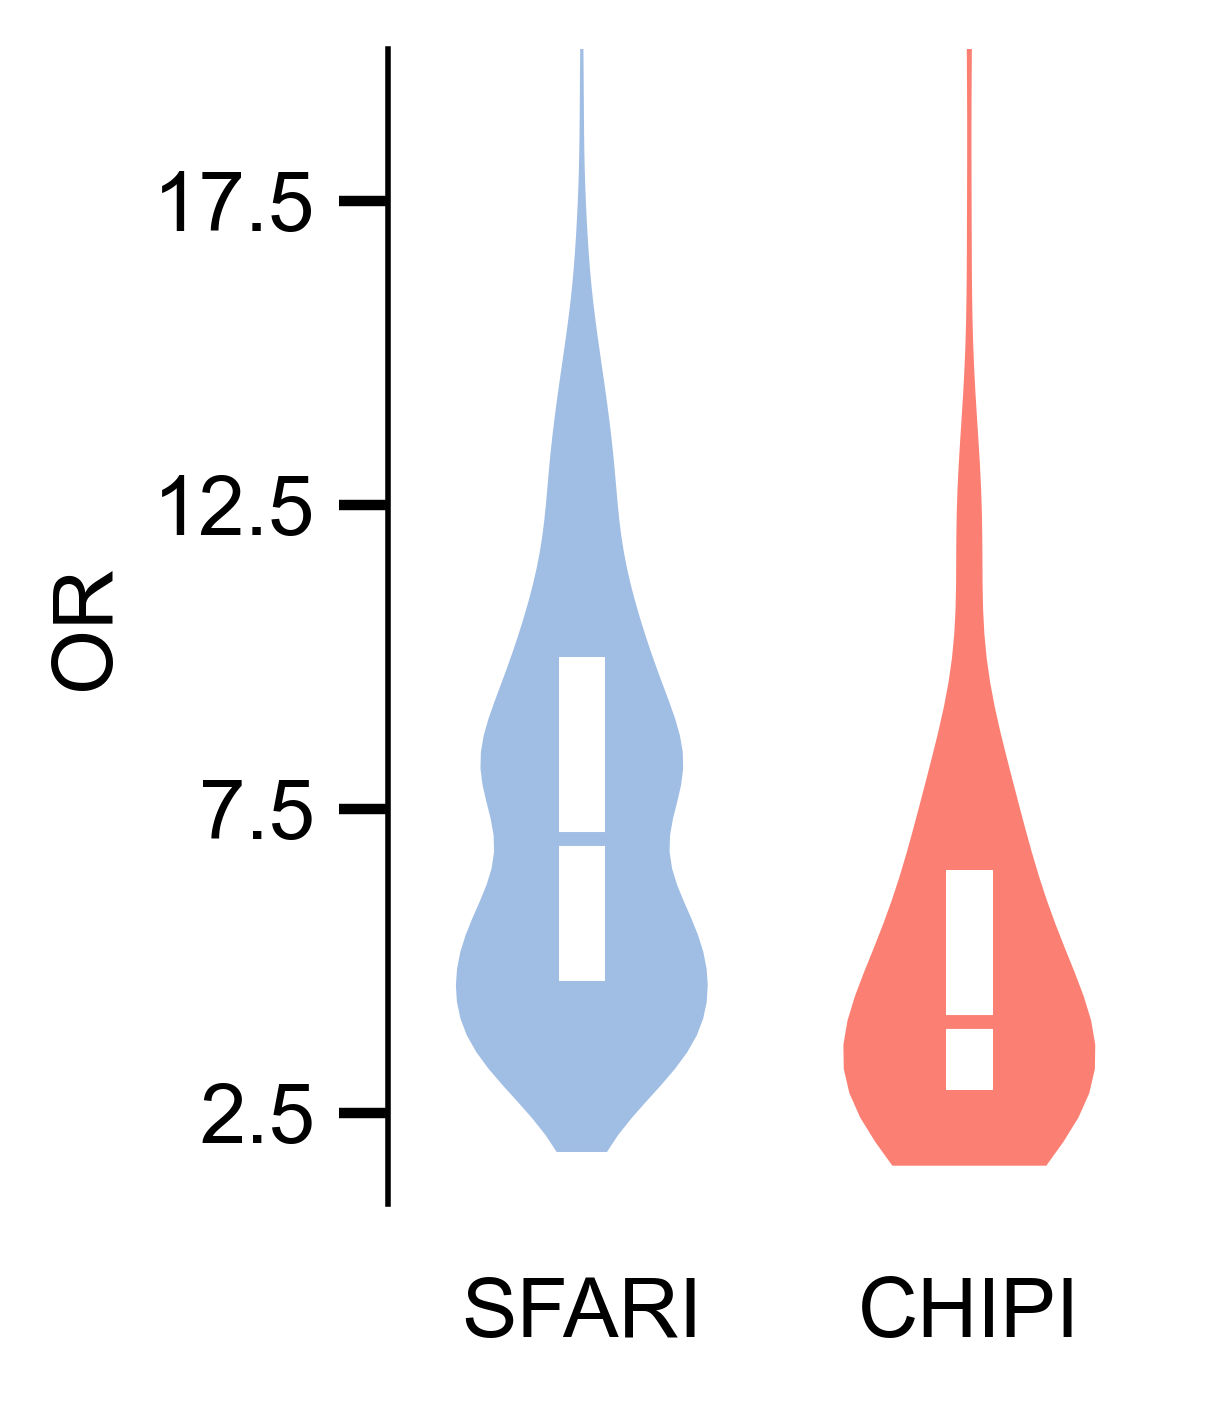

In [44]:

plt.rcParams['font.family'] = 'Arial'
    
plt.figure(figsize=(2, 3),dpi=500)

typeplot=['SFARI','CHIPI']
data=[
    dfsfaribefore[(dfsfaribefore['P']<0.05)&(dfsfaribefore['OR']>1)]['OR'],
    dfchipbefore[(dfchipbefore['p']<0.05)&(dfchipbefore['OR']>1)]['OR']
    
]

violins = plt.violinplot(data, showmeans=False, showmedians=False, showextrema=False,widths=0.65,
                        )

colors =['#a0bde4','#fb8073']
for pc, color in zip(violins['bodies'], colors):
    pc.set_facecolor(color)
    pc.set_edgecolor('black')
    pc.set_alpha(1)

for i, d in enumerate(data):
    plt.boxplot(d, positions=[i + 1], widths=0.12, patch_artist=True,
                boxprops=dict(facecolor='white', color='black',linewidth=0),
                medianprops=dict(color=colors[i],linewidth=2),
                whiskerprops={'linestyle': 'none'},
                capprops={'linestyle': 'none'},
                flierprops=dict(marker='o', color='black', markersize=0))

for pc in violins['bodies']:
    pc.set_edgecolor('none')
plt.xticks([i+1 for i in range(len(typeplot))], typeplot,fontsize=12)
plt.ylabel('OR',fontsize=12)



plt.ylim(1,20)
plt.xlim(0.5,2.5)
'''y_locs = [0,4,8,12]
plt.yticks(y_locs,fontsize=14)'''
plt.tick_params(which='both', width=1.5, length=7, left=True, bottom=False)
plt.xlabel('')
plt.yticks([2.5,7.5,12.5,17.5])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.savefig('Fig2C.pdf', bbox_inches='tight')
plt.show()

In [123]:
chipmean_OR = df1['OR'].mean()
chipmean_p = df1['p'].mean()
chipmean_LCI = df1['LCI'].mean()
chipmean_HCI = df1['HCI'].mean()

In [182]:
df1=dfchipbefore [ (dfchipbefore['ASD_mut']>1)& (dfchipbefore['TD_mut']>0)]
df1

,Unnamed: 0,geneloci,OR,p,LCI,HCI,TD_non,TD_mut,ASD_non,ASD_mut
0,0,chr1-13418-13418-G-A-DDX11L1,3.062500,0.000101,1.741739,5.384795,38.0,16.0,164.0,49.0
1,1,chr1-13418-13418-G-A-LOC102725121,3.062500,0.000101,1.741739,5.384795,38.0,16.0,164.0,49.0
2,2,chr1-1581713-1581713-A-G-CDK11B,2.285714,0.009884,1.219740,4.283282,40.0,14.0,121.0,32.0
3,3,chr1-16363042-16363042-C-T-CLCNKA,1.333333,0.451253,0.630784,2.818361,25.0,12.0,75.0,16.0
4,4,chr1-16363042-16363042-C-T-CLCNKB,1.333333,0.451253,0.630784,2.818361,25.0,12.0,75.0,16.0
...,...,...,...,...,...,...,...,...,...,...
1621,1621,chr1-146395603-146395603-T-G-NBPF19,4.000000,0.214998,0.447083,35.787573,51.0,1.0,117.0,4.0
1622,1622,chr1-146395603-146395603-T-G-NBPF20,4.000000,0.214998,0.447083,35.787573,51.0,1.0,117.0,4.0
1623,1623,chr7-66751582-66751582-A-G-PMS2P4,2.000000,0.571426,0.181353,22.056405,50.0,1.0,144.0,2.0
1624,1624,chr12-64216816-64216816-A-C-MIR10527,5.250000,0.002369,1.802149,15.294237,21.0,4.0,55.0,21.0


In [183]:
df2=dfsfaribefore[(dfsfaribefore['ASD_mut']>1)&(dfsfaribefore['TD_mut']>0)]

In [ ]:
df2

In [165]:
df1['HCI']=df1['HCI'].replace(np.inf,50)

/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [170]:
df1['HCI'].mean()

16.98106078049741

In [166]:
chipmean_OR = df1['OR'].mean()
chipmean_p = df1['p'].mean()
chipmean_LCI = df1['LCI'].mean()
chipmean_HCI = df1['HCI'].mean()

In [167]:
sfarimean_OR = df2['1'].mean()
sfarimean_p = df2['2'].mean()
sfarimean_LCI = df2['3'].mean()
sfarimean_HCI = df2['4'].mean()

In [1]:
df

NameError: name 'df' is not defined

In [249]:
df2=pd.read_csv("cyto_gut_oxidative",)
df2

,type,OR,LCI,HCI
0,cytokine,0.920919,0.502690,1.748554
1,gut,1.077164,0.609665,1.936080
2,oxidative,1.460936,0.805526,2.685178


In [254]:
df=df.rename({"Group":"type"},axis=1)
df

,type,OR,p,LCI,HCI
0,CHIPI,3.134504,0.296608,0.782083,16.981061
1,SFARI,4.547236,0.267456,0.709238,32.617404


In [269]:
dfc=pd.concat([df2,df])
dfc

,type,OR,LCI,HCI,p
0,cytokine,0.920919,0.502690,1.748554,NaN
1,gut,1.077164,0.609665,1.936080,NaN
2,oxidative,1.460936,0.805526,2.685178,NaN
0,CHIPI,3.134504,0.782083,16.981061,0.296608
1,SFARI,4.547236,0.709238,32.617404,0.267456


In [272]:
dfc=dfc.reset_index()
dfc['logOR']=np.log2(dfc['OR'])
dfc['logHCI']=np.log2(dfc['HCI'])
dfc['logLCI']=np.log2(dfc['LCI'])
dfc

,level_0,index,type,OR,LCI,HCI,p,logOR,logHCI,logLCI
0,0,0,cytokine,0.920919,0.502690,1.748554,NaN,-0.118854,0.806162,-0.992259
1,1,1,gut,1.077164,0.609665,1.936080,NaN,0.107238,0.953138,-0.713911
2,2,2,oxidative,1.460936,0.805526,2.685178,NaN,0.546893,1.425017,-0.311996
3,3,0,CHIPI,3.134504,0.782083,16.981061,0.296608,1.648237,4.085855,-0.354606
4,4,1,SFARI,4.547236,0.709238,32.617404,0.267456,2.184990,5.027570,-0.495658


In [281]:
dfc.loc[0,'type']="Cytokine\nDysregulation"
dfc.loc[1,'type']="Intestinal\nFunction "
dfc.loc[2,'type']="Oxidative\nStress"

In [279]:
dfc

,level_0,index,type,OR,LCI,HCI,p,logOR,logHCI,logLCI
0,0,0,Cytokine Dysregulation,0.920919,0.502690,1.748554,NaN,-0.118854,0.806162,-0.992259
1,1,1,Intestinal Function,1.077164,0.609665,1.936080,NaN,0.107238,0.953138,-0.713911
2,2,2,Oxidative Stress,1.460936,0.805526,2.685178,NaN,0.546893,1.425017,-0.311996
3,3,0,CHIPI,3.134504,0.782083,16.981061,0.296608,1.648237,4.085855,-0.354606
4,4,1,SFARI,4.547236,0.709238,32.617404,0.267456,2.184990,5.027570,-0.495658


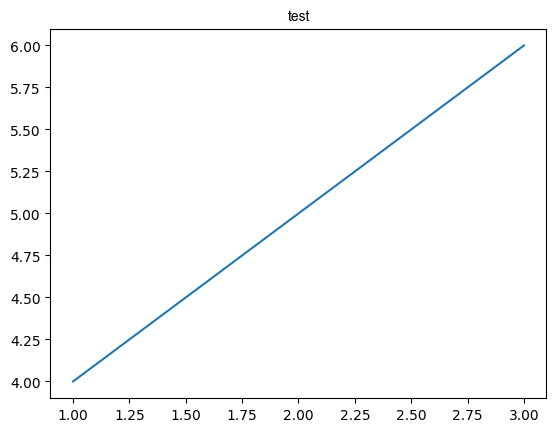

In [290]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

font_path = '/home2/zhenglijing/work/Arial.ttf'font = FontProperties(fname=font_path)

plt.plot([1, 2, 3], [4, 5, 6])
plt.title('test', fontproperties=font)
plt.show()

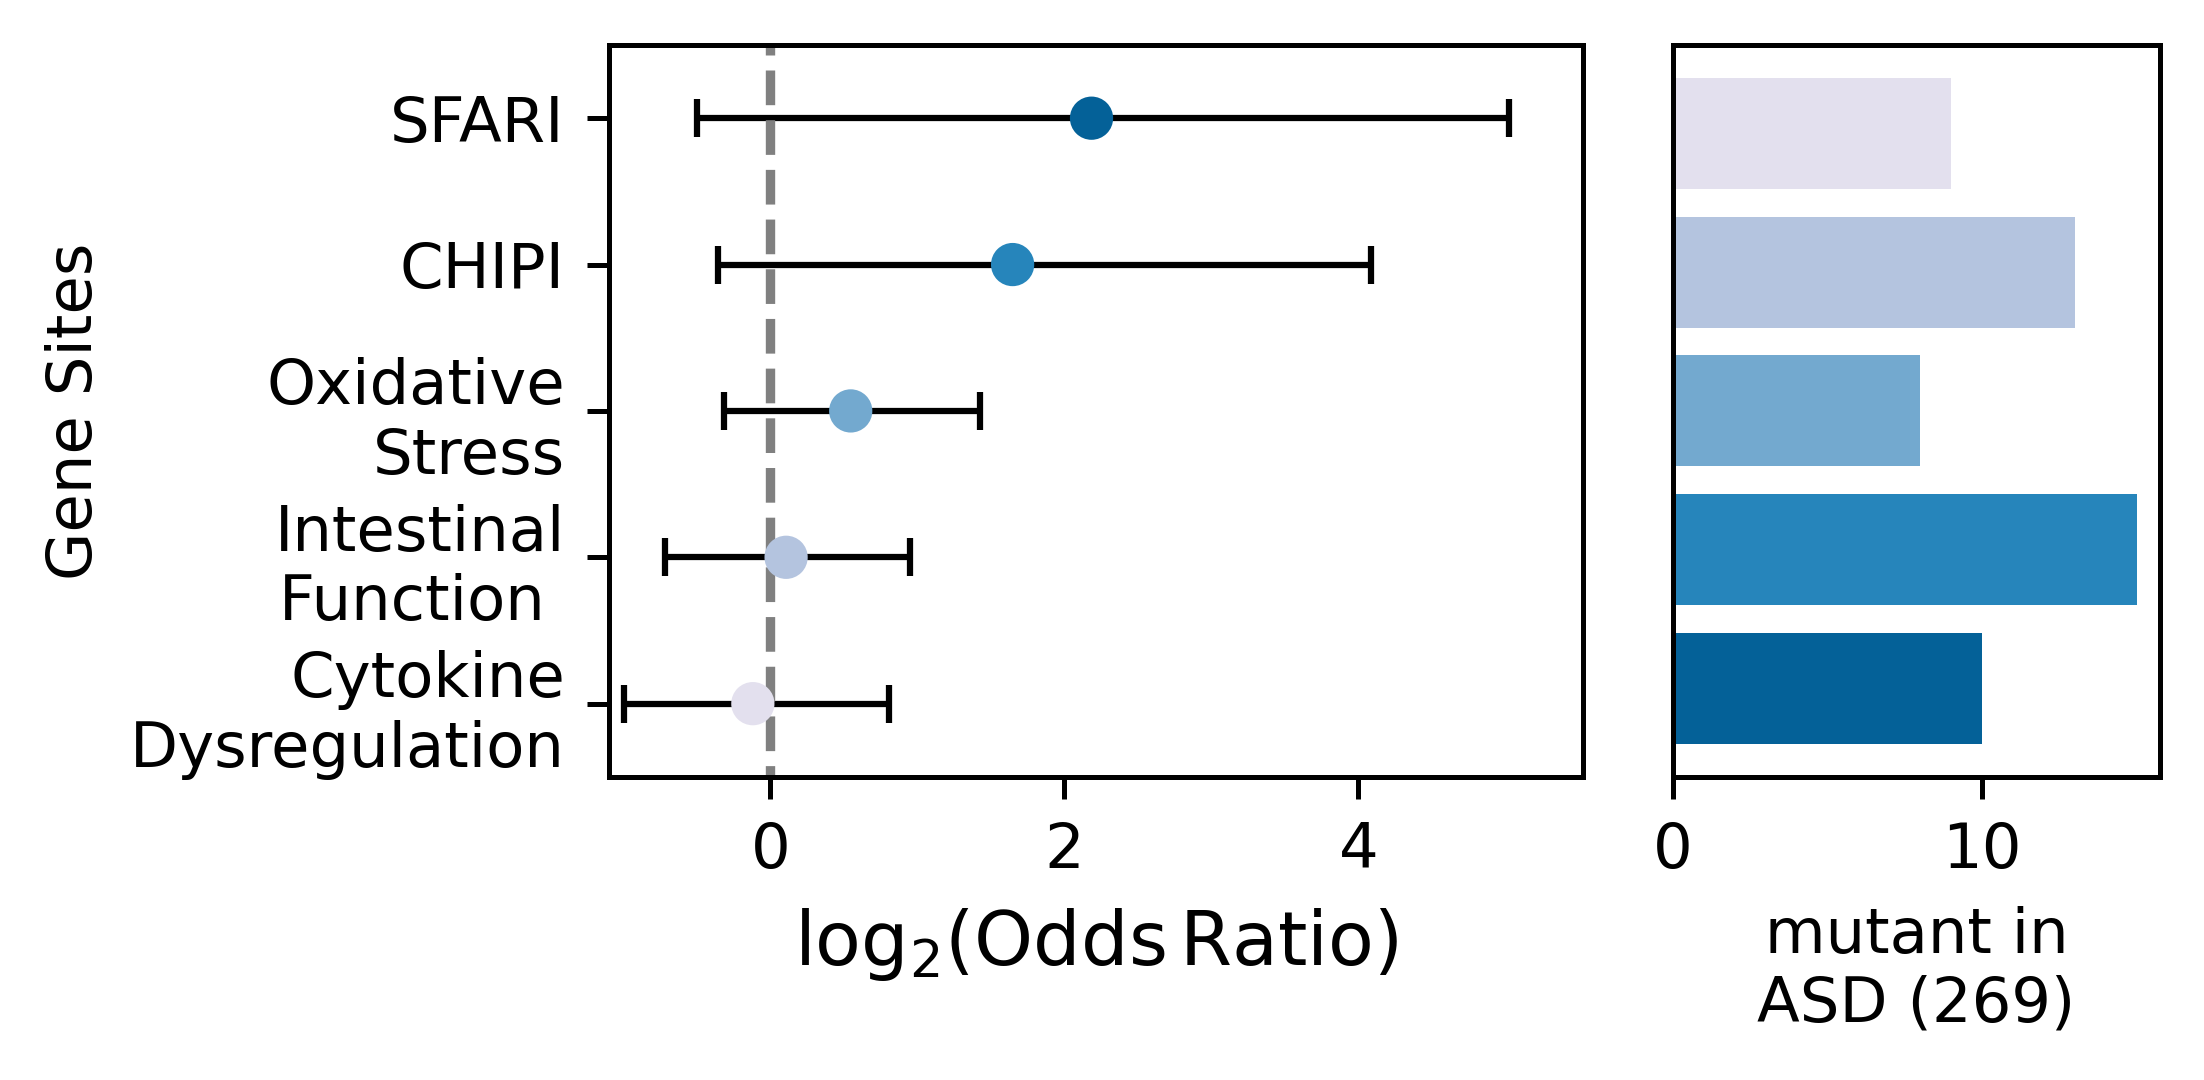

In [295]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['font.family'] = 'Arial'
labels =dfc['type']
ors = dfc['logOR']
ci_low = dfc['logLCI']
ci_high = dfc['logHCI']
plt.subplots(1,2,figsize=(5, 2.5),gridspec_kw={'width_ratios':[2,1]},dpi=450)
plt.subplot(1,2,1)
colors = sns.color_palette('PuBu', len(ors))[::1]
plt.scatter(ors, range(len(ors)), c=colors, s=35, zorder=3)

for i in range(len(ors)):
    plt.plot([ci_low[i], ci_high[i]], [i, i], color='black', linewidth=.8)
    plt.plot([ors[i], ors[i]], [i-0.1, i+0.1], color='black', linewidth=.8)plt.errorbar(ors, range(len(ors)), xerr=[[ors[i]-ci_low[i] for i in range(len(ors))], [ci_high[i]-ors[i] for i in range(len(ors))]], fmt='none', ecolor='black', capsize=3, elinewidth=1)

plt.xlabel(r'$\log_2(\mathrm{Odds\,Ratio})$', fontsize=12, fontweight='bold')
plt.ylabel('Gene Sites')

plt.xlim(-1.1, max(ci_high) * 1.1)
plt.ylim(-.5,4.5)
plt.yticks(range(len(ors)), labels)

plt.vlines(0,-1,5,color='grey',ls='--')

plt.subplot(1,2,2)
for i in range(len(ors)):
    plt.barh(y=i,width=mut_asd[i],color=sns.color_palette('PuBu', len(ors))[::-1][i])
plt.xlabel(' mutant in \nASD (269)')
plt.yticks([])
plt.tight_layout()
plt.show()

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


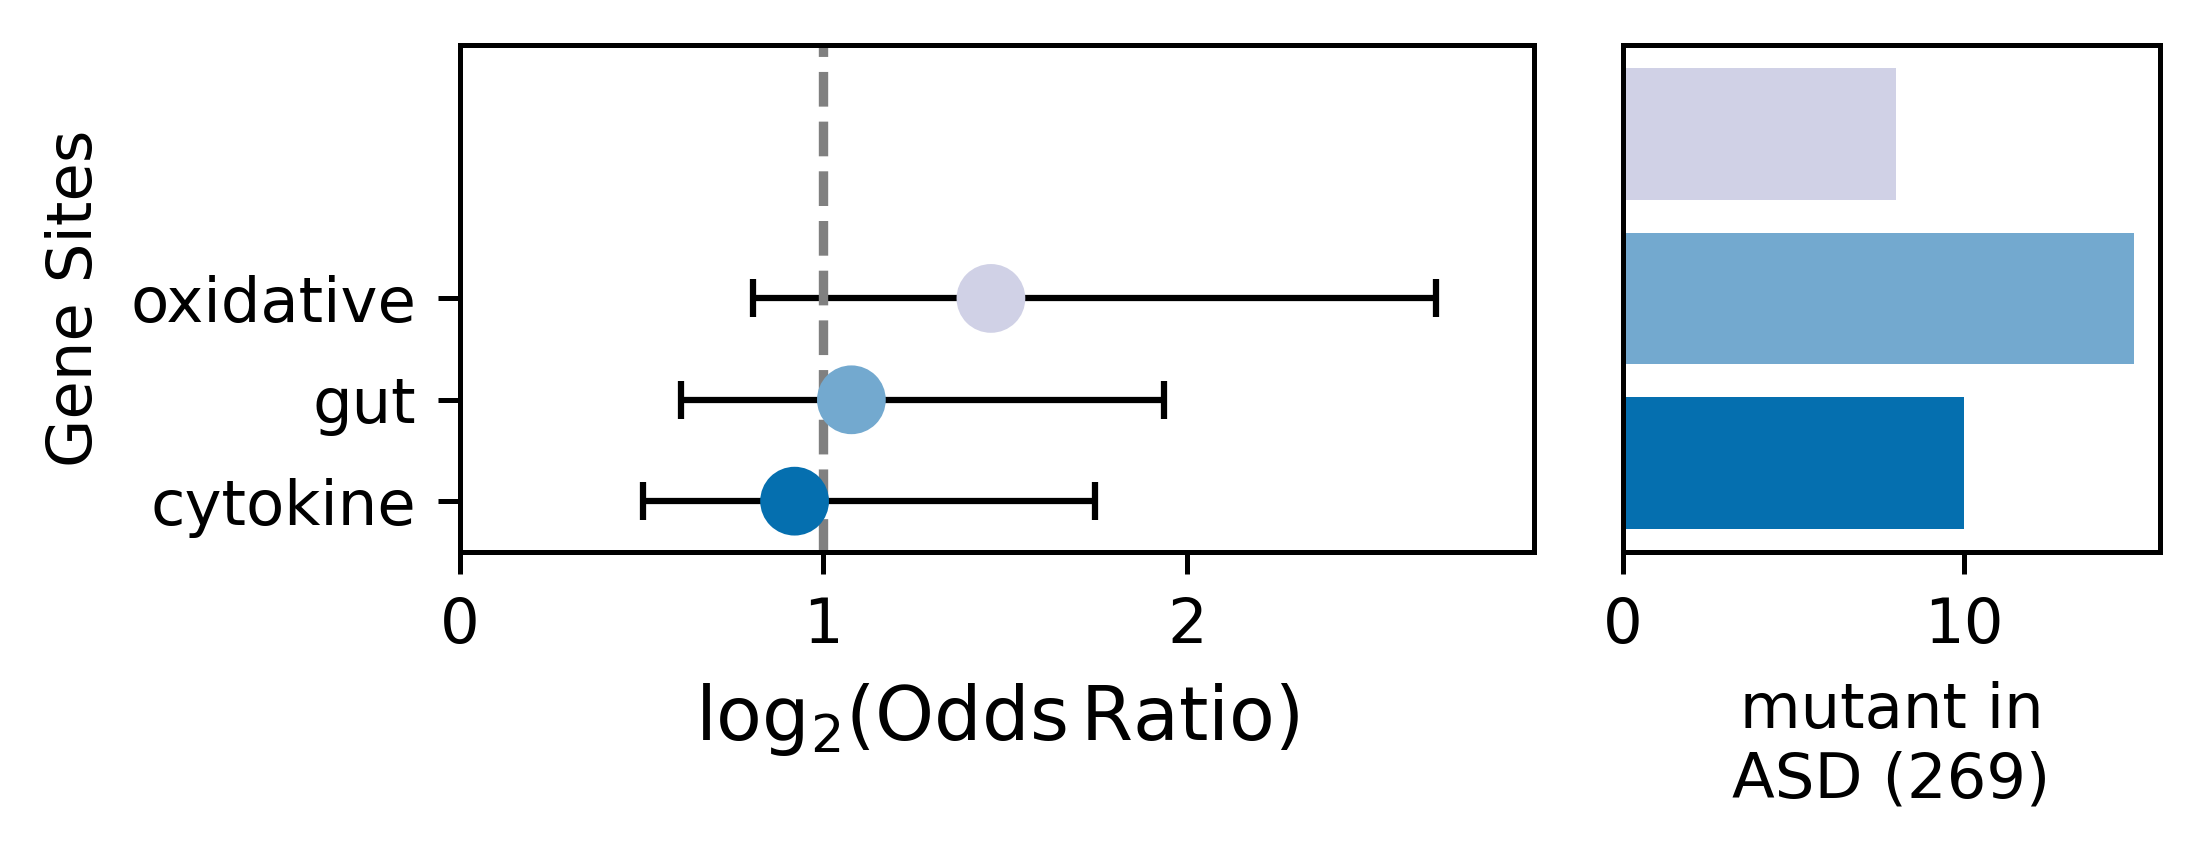

In [294]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

labels =df2['type']
ors = df2['OR']
ci_low = df2['LCI']
ci_high = df2['HCI']
plt.subplots(1,2,figsize=(5, 2),gridspec_kw={'width_ratios':[2,1]},dpi=450)
plt.subplot(1,2,1)
colors = sns.color_palette('PuBu', len(ors))[::-1]
plt.scatter(ors, range(len(ors)), c=colors, s=100, zorder=3)

for i in range(len(ors)):
    plt.plot([ci_low[i], ci_high[i]], [i, i], color='black', linewidth=.8)
    plt.plot([ors[i], ors[i]], [i-0.1, i+0.1], color='black', linewidth=.8)plt.errorbar(ors, range(len(ors)), xerr=[[ors[i]-ci_low[i] for i in range(len(ors))], [ci_high[i]-ors[i] for i in range(len(ors))]], fmt='none', ecolor='black', capsize=3, elinewidth=1)

plt.xlabel(r'$\log_2(\mathrm{Odds\,Ratio})$', fontsize=12, fontweight='bold')
plt.ylabel('Gene Sites')

plt.xlim(0, max(ci_high) * 1.1)
plt.ylim(-.5,4.5)
plt.yticks(range(len(ors)), labels)

plt.vlines(1,-1,5,color='grey',ls='--')

plt.subplot(1,2,2)
for i in range(len(ors)):
    plt.barh(y=i,width=mut_asd[i],color=sns.color_palette('PuBu', len(ors))[::-1][i])
plt.xlabel(' mutant in \nASD (269)')
plt.yticks([])
plt.tight_layout()
plt.show()

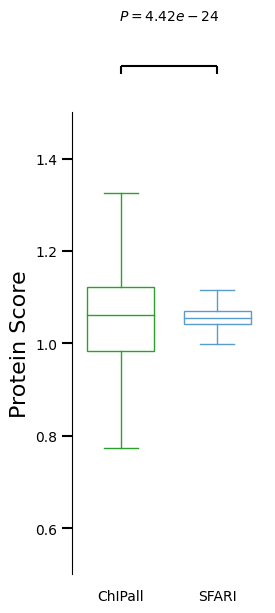

In [88]:

    
plt.figure(figsize=(2.5, 6))

typeplot=['ChIPall', 'SFARI'  ]
data=[
    dfchipbefore['1'],
    dfsfaribefore[1]
]


colors =["#2CA02C","#5A9CCB", "#784880",  '#CA4B32','#a0bde4','#b3b3b3',]
for pc, color in zip(violins['bodies'], colors):
    pc.set_facecolor(color)
    pc.set_edgecolor('black')
    pc.set_alpha(1)

for i, d in enumerate(data):
    plt.boxplot(d, positions=[i + 1], widths=0.7, patch_artist=True,
                boxprops=dict(facecolor='white',edgecolor=colors[i],linewidth=1),
                medianprops=dict(color=colors[i],linewidth=1),
                whiskerprops={'color': colors[i]},
                capprops={'color': colors[i]},
                flierprops=dict(marker='o', color='black', markersize=0))


plt.xticks([i+1 for i in range(len(typeplot))], typeplot)
plt.ylabel('DNA score')


u_statistic, p_value = stats.mannwhitneyu(data[0].dropna(),data[1].dropna(),alternative='greater')
plt.text(1.5, 1.7, f'$P = {p_value:.2e}$', ha='center')
plot__p(1,2,1.6)

plt.ylim(0.5,1.5)
plt.xlim(0.5,2.5)
'''y_locs = [0,4,8,12]
plt.yticks(y_locs,fontsize=14)'''
plt.tick_params(which='both', width=1.5, length=7, left=True, bottom=False)
plt.xlabel('')
plt.ylabel('Protein Score', fontsize=16)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.show()

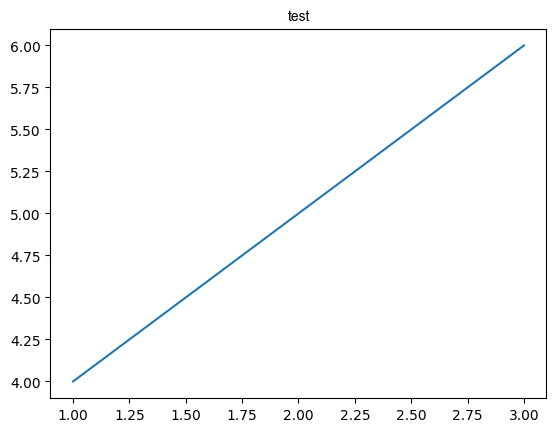

In [36]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

font_path = '/home2/zhenglijing/work/Arial.ttf'font = FontProperties(fname=font_path)

plt.plot([1, 2, 3], [4, 5, 6])
plt.title('test', fontproperties=font)
plt.show()

In [120]:
dfsfaribefore.set_index('0')
dfsfaribefore.rename

,Unnamed: 0,1,2,3,4,TD_non,TD_mut,ASD_non,ASD_mut
0,,,,,,,,,
chr1-63825753-G-A-ALG6,0,5.000000e+00,0.037730,1.095550,22.819592,52.0,2.0,145.0,10.0
chr1-110252010-T-C-GSTM1,1,2.333333e+00,0.219503,0.603381,9.023222,51.0,3.0,149.0,7.0
chr1-247938569-C-T-OR1C1,2,1.200000e+01,0.016967,1.560352,92.286867,53.0,1.0,149.0,12.0
chr2-176707805-G-T-LNPK,3,4.500000e+00,0.054352,0.972294,20.827031,52.0,2.0,134.0,9.0
chr3-11925489-C-T-SYN2,4,1.285195e+14,0.999989,0.000000,inf,54.0,0.0,189.0,24.0
...,...,...,...,...,...,...,...,...,...
chr7-151866105-C-G-KMT2C,9469,1.859326e-21,1.000000,0.000000,inf,53.0,1.0,148.0,0.0
chr7-151876806-G-A-KMT2C,9470,1.112299e-11,0.999933,0.000000,inf,52.0,1.0,103.0,0.0
chrX-32716111-G-A-DMD,9471,7.789052e-15,0.999998,0.000000,inf,53.0,1.0,204.0,0.0


In [47]:
result_adjusted_df

,OR,LCI,HCI
chr7-151882735-G-A-KMT2C,1.468369,1.074815,2.006025
chr3-195475989-G-A-MUC4,1.410655,1.097724,1.812795
chr7-100643477-A-C-MUC12,1.379690,1.078650,1.764747
chr7-151882623-AG---KMT2C,1.330388,1.028866,1.720276
chr3-195513680-A-T-MUC4,1.327802,1.022865,1.723646
chr3-195474159-G-A-MUC4,1.288662,1.001117,1.658796
chr3-11925489-C-T-SYN2,1.272878,1.005504,1.611351
chr7-74152376-T-C-GTF2I,1.263979,1.007485,1.585774


In [58]:
result_adjusted_df['index']=result_adjusted_df.index
def format_gene2(row):
    parts = row.split('-')    chrom = parts[0]    pos = parts[1]    ref = parts[2]    alt = parts[3]    return f"{chrom}:g.{pos}{ref}>{alt}"
result_adjusted_df['gene2_formatted'] = result_adjusted_df['index'].apply(format_gene2)

result_adjusted_df

,OR,LCI,HCI,index,gene2_formatted
chr7-151882735-G-A-KMT2C,1.468369,1.074815,2.006025,chr7-151882735-G-A-KMT2C,chr7:g.151882735G>A
chr3-195475989-G-A-MUC4,1.410655,1.097724,1.812795,chr3-195475989-G-A-MUC4,chr3:g.195475989G>A
chr7-100643477-A-C-MUC12,1.379690,1.078650,1.764747,chr7-100643477-A-C-MUC12,chr7:g.100643477A>C
chr7-151882623-AG---KMT2C,1.330388,1.028866,1.720276,chr7-151882623-AG---KMT2C,chr7:g.151882623AG>
chr3-195513680-A-T-MUC4,1.327802,1.022865,1.723646,chr3-195513680-A-T-MUC4,chr3:g.195513680A>T
chr3-195474159-G-A-MUC4,1.288662,1.001117,1.658796,chr3-195474159-G-A-MUC4,chr3:g.195474159G>A
chr3-11925489-C-T-SYN2,1.272878,1.005504,1.611351,chr3-11925489-C-T-SYN2,chr3:g.11925489C>T
chr7-74152376-T-C-GTF2I,1.263979,1.007485,1.585774,chr7-74152376-T-C-GTF2I,chr7:g.74152376T>C


In [64]:
result_adjusted_df['gene2_formatted'] = result_adjusted_df['gene2_formatted'].str.replace(
    'chr7:g.151882623AG>', 
    'chr7:g.151882623delAG',
    regex=False)

In [65]:
result_adjusted_df

,OR,LCI,HCI,index,gene2_formatted
chr7-151882735-G-A-KMT2C,1.468369,1.074815,2.006025,chr7-151882735-G-A-KMT2C,chr7:g.151882735G>A
chr3-195475989-G-A-MUC4,1.410655,1.097724,1.812795,chr3-195475989-G-A-MUC4,chr3:g.195475989G>A
chr7-100643477-A-C-MUC12,1.379690,1.078650,1.764747,chr7-100643477-A-C-MUC12,chr7:g.100643477A>C
chr7-151882623-AG---KMT2C,1.330388,1.028866,1.720276,chr7-151882623-AG---KMT2C,chr7:g.151882623delAG
chr3-195513680-A-T-MUC4,1.327802,1.022865,1.723646,chr3-195513680-A-T-MUC4,chr3:g.195513680A>T
chr3-195474159-G-A-MUC4,1.288662,1.001117,1.658796,chr3-195474159-G-A-MUC4,chr3:g.195474159G>A
chr3-11925489-C-T-SYN2,1.272878,1.005504,1.611351,chr3-11925489-C-T-SYN2,chr3:g.11925489C>T
chr7-74152376-T-C-GTF2I,1.263979,1.007485,1.585774,chr7-74152376-T-C-GTF2I,chr7:g.74152376T>C


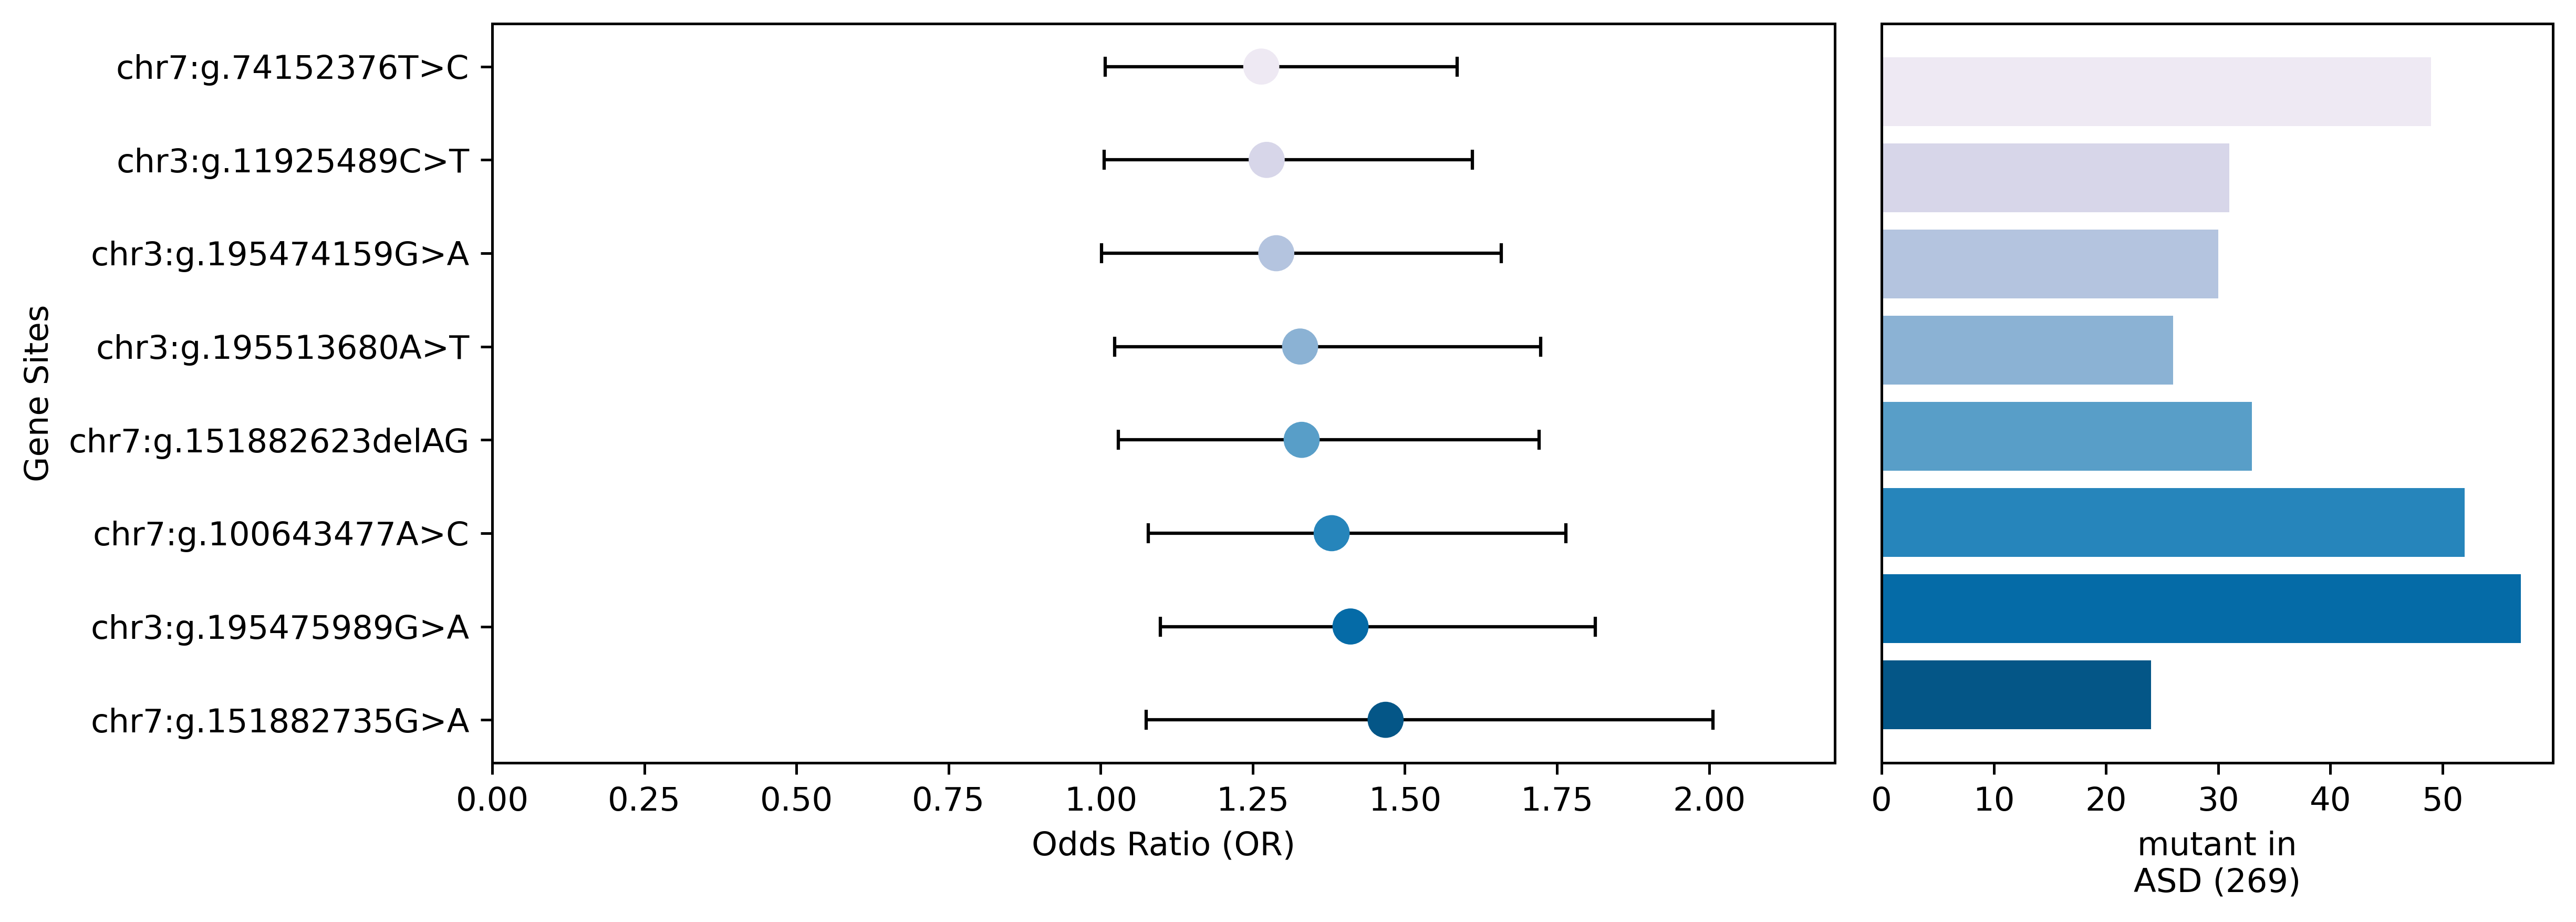

In [66]:
plt.rcParams['font.family'] = 'Arial'
labels =result_adjusted_df['gene2_formatted']
mut_asd=[gene_counts_dict[i].loc['mut','ASD'] for i in result_adjusted_df.index ]
ors = result_adjusted_df['OR']
ci_low = result_adjusted_df['LCI']
ci_high = result_adjusted_df['HCI']
plt.subplots(1,2,figsize=(11, 4),gridspec_kw={'width_ratios':[2,1]},dpi=450)
plt.subplot(1,2,1)
colors = sns.color_palette('PuBu', len(ors))[::-1]
plt.scatter(ors, range(len(ors)), c=colors, s=100, zorder=3)

for i in range(len(ors)):
    plt.plot([ci_low[i], ci_high[i]], [i, i], color='black', linewidth=.8)
    plt.plot([ors[i], ors[i]], [i-0.1, i+0.1], color='black', linewidth=.8)plt.errorbar(ors, range(len(ors)), xerr=[[ors[i]-ci_low[i] for i in range(len(ors))], [ci_high[i]-ors[i] for i in range(len(ors))]], fmt='none', ecolor='black', capsize=3, elinewidth=1)

plt.xlabel('Odds Ratio (OR)')
plt.ylabel('Gene Sites')

plt.xlim(0, max(ci_high) * 1.1)

plt.yticks(range(len(ors)), labels)
    
plt.subplot(1,2,2)
for i in range(len(ors)):
    plt.barh(y=i,width=mut_asd[i],color=sns.color_palette('PuBu', len(ors))[::-1][i])
plt.xlabel(' mutant in \nASD (269)')
plt.yticks([])
plt.tight_layout()
plt.show()

## vaf>0.02

In [45]:
dfSFARIf=dfSFARI[dfSFARI['vaf']>0.02]

In [46]:
dfSFARIf.head(5)

,level_0,index,Gene.refGene,Chr,Start,End,Ref,Alt,Func.refGene,GeneDetail.refGene,...,AMR.sites.2015_08,SAS.sites.2015_08,EUR.sites.2015_08,EAS.sites.2015_08,p_value,vaf,type,age,combine,depth
54,54,1,MUC4,chr3,195467837,195467837,A,G,intergenic,dist=7413;dist=5801,...,0.1138,0.0603,0.1372,0.001,3.086881e-07,0.311828,mother,34.304110,chr3-195467837-A-G-MUC4,87.0
56,56,1,MUC4,chr3,195467853,195467853,C,T,intergenic,dist=7429;dist=5785,...,0.121,0.0644,0.1402,0.003,3.669804e-08,0.283951,mother,34.304110,chr3-195467853-C-T-MUC4,79.0
135,135,0,DOCK1,chr10,128952219,128952219,C,T,intronic,.,...,0.2133,0.3415,0.2664,0.0367,6.393978e-04,0.303797,mother,34.304110,chr10-128952219-C-T-DOCK1,NaN
439,439,1,SYN2,chr3,11933101,11933101,T,A,intergenic,dist=44742;dist=112733,...,0.1772,0.1012,0.2604,0.2778,3.395323e-05,0.129032,mother,34.252055,chr3-11933101-T-A-SYN2,47.0
440,440,0,SYN2,chr3,12299722,12299722,G,A,intergenic,dist=66190;dist=29262,...,0.0159,0.0818,0.0467,0.0228,1.513833e-09,0.083333,mother,34.252055,chr3-12299722-G-A-SYN2,47.0


In [47]:
listcombine=dfSFARIf['combine'].unique().tolist()

In [48]:
dfall=dfSFARIf[dfSFARIf['depth']>=10]

In [49]:
csv_file_path = '/home2/zhenglijing/work/bigwig/allcountsfari.csv'
dfcount=pd.read_csv(csv_file_path,index_col=0)
dfcount=dfcount.set_index('geneloci')
dfcount

,ASDcount,TDcount
geneloci,,
chr1-10697392-C-T-CASZ1,33,0
chr1-10697463-C-A-CASZ1,33,0
chr1-10697704-G-T-CASZ1,31,0
chr1-10697918-G-T-CASZ1,32,0
chr1-10698308-C-A-CASZ1,31,0
...,...,...
chrY-17661797-G-T-NLGN4Y,133,33
chrY-17663755-T-C-NLGN4Y,84,30
chrY-17663804-A-T-NLGN4Y,105,33


In [50]:
gene_counts_dict={}
for gene in tqdm(listcombine):
    ASDcount=dfcount.loc[gene,'ASDcount']
    TDcount=dfcount.loc[gene,'TDcount']    
    dftest=dfall[dfall['combine']==gene]
    TDmut=len(dftest[dftest['type']=="TD"])
    ASDmut=len(dftest[dftest['type']=="ASD"])
    df4= pd.DataFrame([[TDcount-TDmut,ASDcount-ASDmut],
                     [TDmut,ASDmut]
                     ],columns=['TD','ASD'],index=['non','mut'])
    gene_counts_dict[gene]=df4

100%|██████████| 76996/76996 [06:54<00:00, 185.73it/s]


In [51]:
df_dict2={}
for gene_name, table in tqdm(list(gene_counts_dict.items())):
    dfls=[]
    nonTD=table.loc['non','TD']
    for i in  range(nonTD):
        dfls.append([0,0])
    nonASD=table.loc['non','ASD']
    for i in  range(nonASD):
        dfls.append([0,1])
    mutTD=table.loc['mut','TD']    
    for i in  range(mutTD):
        dfls.append([1,0])
    mutASD=table.loc['mut','ASD']
    for i in  range(mutASD):
        dfls.append([1,1])
    dfsub=pd.DataFrame(dfls,columns=['X','y'])
    df_dict2[gene_name]=dfsub

100%|██████████| 76996/76996 [00:46<00:00, 1657.46it/s]


In [ ]:
import numpy as np  
import pandas as pd  
import statsmodels.api as sm  
from tqdm import tqdm  
from sklearn.preprocessing import StandardScaler

listresult = []  
faills=[]
for key,value in tqdm(list(df_dict2.items())):  

    try:  
        X = np.array(value['X']).reshape(-1, 1)
        scaler = StandardScaler()  
        features = X
        features_scaled = scaler.fit_transform(X)  
        model = sm.Logit(value['y'], features_scaled).fit(maxiter=10000)  

        coef = model.params.iloc[0] 
        OR_values = np.exp(coef) 
        pvalues = model.pvalues  .iloc[0]
        conf_int = model.conf_int(alpha=0.05)
        conf_int_lower = np.exp(conf_int.iloc[0,0])#.iloc)  
        conf_int_upper = np.exp(conf_int.iloc[0,1])#.iloc)  

        listresult.append([key, OR_values, pvalues, conf_int_lower, conf_int_upper])  
    except Exception as e:  
        print(f"{gene} failed with error: {e}")  
        faills.append([key,value])



In [147]:
path='/home2/zhenglijing/work/删除AD>=5/CHIPIvaf>0.1.csv'
df2=pd.read_csv(path)
df2

,Unnamed: 0,0,1,2,3,4
0,0,chr3-195467837-A-G-MUC4,1.206342,0.180938,0.916468,1.587902
1,1,chr3-195467853-C-T-MUC4,1.191720,0.209593,0.906110,1.567356
2,2,chr3-11933101-T-A-SYN2,1.091512,0.478790,0.856625,1.390806
3,3,chr7-153418487-C-T-DPP6,1.000000,1.000000,0.494583,2.021904
4,4,chr7-153418491-G-A-DPP6,1.000000,1.000000,0.494583,2.021904
...,...,...,...,...,...,...
9811,9811,chr7-140483057-T-C-BRAF,1.053856,0.696202,0.809889,1.371315
9812,9812,chr7-151874581-G-C-KMT2C,1.054686,0.692168,0.810311,1.372761
9813,9813,chrX-53579613-C-A-HUWE1,1.046564,0.717808,0.817651,1.339564
9814,9814,chrX-79971579-C-A-BRWD3,1.059924,0.677141,0.805932,1.393963


In [148]:
df2 = df2.drop('Unnamed: 0', axis=1)

In [149]:
df2

,0,1,2,3,4
0,chr3-195467837-A-G-MUC4,1.206342,0.180938,0.916468,1.587902
1,chr3-195467853-C-T-MUC4,1.191720,0.209593,0.906110,1.567356
2,chr3-11933101-T-A-SYN2,1.091512,0.478790,0.856625,1.390806
3,chr7-153418487-C-T-DPP6,1.000000,1.000000,0.494583,2.021904
4,chr7-153418491-G-A-DPP6,1.000000,1.000000,0.494583,2.021904
...,...,...,...,...,...
9811,chr7-140483057-T-C-BRAF,1.053856,0.696202,0.809889,1.371315
9812,chr7-151874581-G-C-KMT2C,1.054686,0.692168,0.810311,1.372761
9813,chrX-53579613-C-A-HUWE1,1.046564,0.717808,0.817651,1.339564
9814,chrX-79971579-C-A-BRWD3,1.059924,0.677141,0.805932,1.393963


In [ ]:
listresult2 = df2.values.tolist()
listresult2

In [152]:
result_adjusted2 = {}
  
for i in listresult:  
    if (i[2] < 0.05)&(i[1] > 1): 
        result_adjusted2[i[0]]=[i[1],i[3],i[4]]

In [153]:
result_adjusted_df2=pd.DataFrame(columns=['OR','LCI','HCI'])
for key in result_adjusted2.keys():
    result_adjusted_df2.loc[key]=result_adjusted2[key]

In [156]:
result_adjusted_df2=result_adjusted_df2.sort_values(('OR'),ascending=False)

In [157]:
result_adjusted_df2

,OR,LCI,HCI
chr7-151882735-G-A-KMT2C,1.468369,1.074815,2.006025
chr3-195475989-G-A-MUC4,1.410655,1.097724,1.812795
chr7-100643477-A-C-MUC12,1.379690,1.078650,1.764747
chr7-151882623-AG---KMT2C,1.330388,1.028866,1.720276
chr3-195513680-A-T-MUC4,1.327802,1.022865,1.723646
chr3-195474159-G-A-MUC4,1.288662,1.001117,1.658796
chr3-11925489-C-T-SYN2,1.272878,1.005504,1.611351
chr7-74152376-T-C-GTF2I,1.263979,1.007485,1.585774


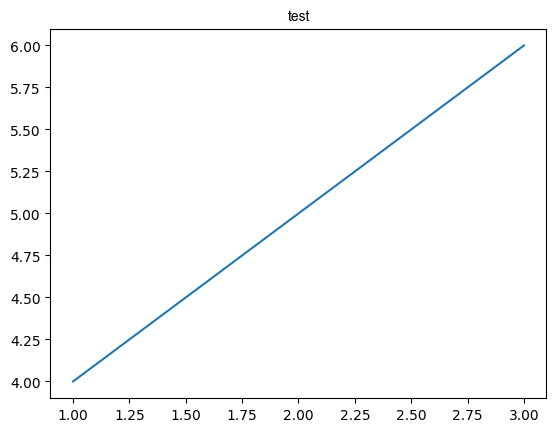

In [134]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

font_path = '/home2/zhenglijing/work/Arial.ttf'font = FontProperties(fname=font_path)

plt.plot([1, 2, 3], [4, 5, 6])
plt.title('test', fontproperties=font)
plt.show()

In [ ]:
result_adjusted_df=result_adjusted_df.sort_values(('OR'),ascending=False)

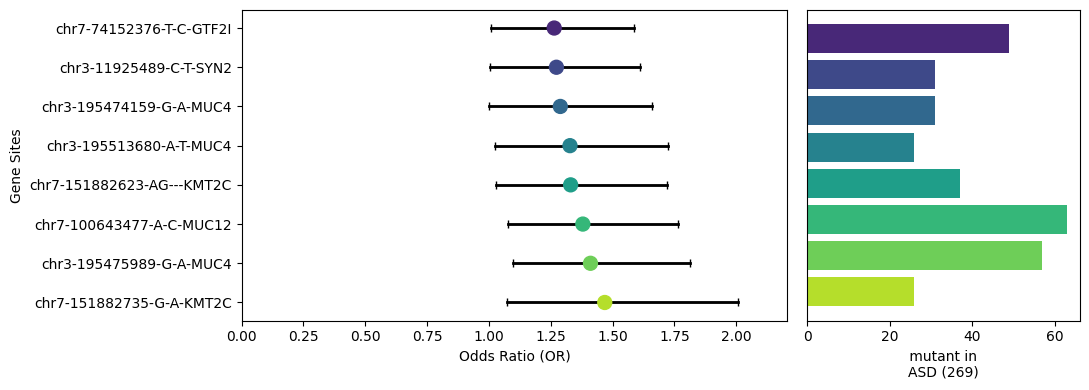

In [159]:
plt.rcParams['font.family'] = 'Arial'
labels =result_adjusted_df.index
mut_asd=[gene_counts_dict[i].loc['mut','ASD'] for i in result_adjusted_df.index ]
ors = result_adjusted_df['OR']
ci_low = result_adjusted_df['LCI']
ci_high = result_adjusted_df['HCI']
plt.subplots(1,2,figsize=(11, 4),gridspec_kw={'width_ratios':[2,1]})
plt.subplot(1,2,1)
colors = sns.color_palette('viridis',len(ors))[::-1]
plt.scatter(ors, range(len(ors)), c=colors, s=100, zorder=3)

for i in range(len(ors)):
    plt.plot([ci_low[i], ci_high[i]], [i, i], color='black', linewidth=2)
    plt.plot([ors[i], ors[i]], [i-0.1, i+0.1], color='black', linewidth=2)plt.errorbar(ors, range(len(ors)), xerr=[[ors[i]-ci_low[i] for i in range(len(ors))], [ci_high[i]-ors[i] for i in range(len(ors))]], fmt='none', ecolor='black', capsize=3, elinewidth=1)

plt.xlabel('Odds Ratio (OR)')
plt.ylabel('Gene Sites')

plt.xlim(0, max(ci_high) * 1.1)

plt.yticks(range(len(ors)), labels)
    
plt.subplot(1,2,2)
for i in range(len(ors)):
    plt.barh(y=i,width=mut_asd[i],color=sns.color_palette('viridis',len(ors))[::-1][i])
plt.xlabel(' mutant in \nASD (269)')
plt.yticks([])
plt.tight_layout()
plt.show()